
# Logistic Regression Practice


Show below is a logistic-regression classifiers decision boundaries on the
iris dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set. The
datapoints are colored according to their labels (there are three).

Here is another great logistic regression tutorial using the statsmodels package:
http://blog.yhat.com/posts/logistic-regression-python-rodeo.html.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from IPython.core.display import Image

%matplotlib inline

consult: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [7]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # first two features
y = iris.target

h = .02  # mesh step size

Create an instance of LogisticRegression in the linear_model package and fit it to the features and target:

In [22]:
logreg = linear_model.LogisticRegression(C=1e5)

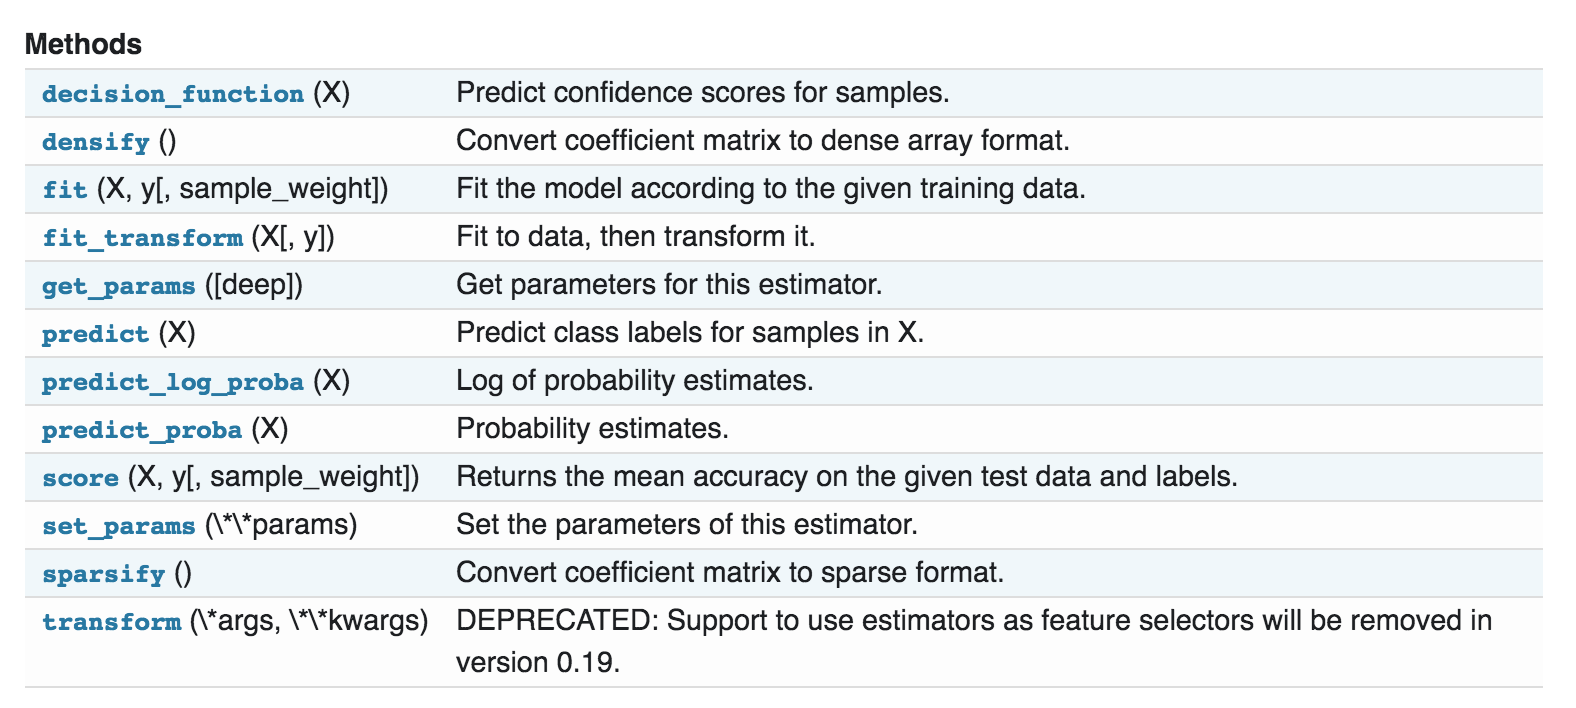

In [21]:
Image(filename = 'logistic_regression/assets/logreg_methods.png', width=750)

In [23]:
logreg.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [12]:
logreg.get_params()

{'C': 100000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

The predictions in the array above look suspiciously ordered!  This is why we need to choose random indeces when doing train/test splits.

In [29]:
logreg.predict_log_proba(X)[0:10]

array([[-0.09891036, -2.68579175, -3.64931673],
       [-0.26836089, -1.53073492, -3.96375726],
       [-0.16616302, -1.95058984, -4.51883964],
       [-0.2037639 , -1.73949614, -4.74027792],
       [-0.07297404, -2.97361042, -3.94990059],
       [-0.06643232, -3.84172086, -3.15081746],
       [-0.09830191, -2.45525809, -4.85571732],
       [-0.11652907, -2.422777  , -3.84807441],
       [-0.29564011, -1.38456355, -5.20087062],
       [-0.21961627, -1.72244309, -3.98760963]])

In [31]:
logreg.predict_proba(X)[0:10]

array([[ 0.9058239 ,  0.0681672 ,  0.02600889],
       [ 0.76463179,  0.21637659,  0.01899162],
       [ 0.84690816,  0.14219018,  0.01090167],
       [ 0.81565492,  0.17560886,  0.00873622],
       [ 0.92962497,  0.05111842,  0.01925662],
       [ 0.93572624,  0.02145665,  0.04281711],
       [ 0.90637521,  0.08584104,  0.00778375],
       [ 0.89000422,  0.08867502,  0.02132075],
       [ 0.74405516,  0.25043308,  0.00551176],
       [ 0.80282681,  0.17862921,  0.01854399]])

In [43]:
logreg.score(X, y)

0.80666666666666664

In [37]:
# Code below slightly modified from the following:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

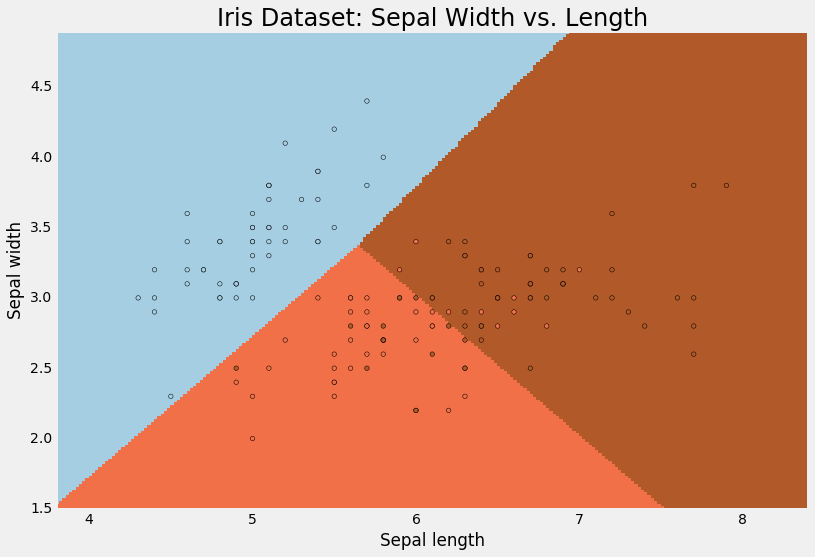

In [40]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Iris Dataset: Sepal Width vs. Length', fontsize = 24)

plt.show()

### Dropping a dummy & including an intercept

Finally, here is a pretty straightforward explanation of the need to drop a dummy variable in a regression: http://dss.princeton.edu/online_help/analysis/dummy_variables.htm

In particular, 

"Interpreting results

The decision as to which level is not coded is often arbitrary. The level which is not coded is the category to which all other categories will be compared. As such, often the biggest group will be the not- coded category. For example, often "Caucasian" will be the not-coded group if that is the race of the majority of participants in the sample. In that case, if you have a variable called "Asian", the coefficient on the "Asian" variable in your regression will show the effect being Asian rather than Caucasian has on your dependant variable.

In our example, "freshman" was not coded so that we could determine if being a sophomore, junior, or senior predicts a different depressive level than being a freshman. Consequently, if the variable, "junior" was significant in our regression, with a positive beta coefficient, this would mean that juniors are significantly more depressed than freshman. Alternatively, we could have decided to not code "senior," if we thought that being a senior is qualitatively different from being of another year."

...and why to include an intercept term, especially when using dummy variables (NB some stats packages will do this automatically, so check first): http://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/

In particular, 

"If you have dummy variables in  your model, though, the intercept has more meaning.  Dummy coded variables have values of 0 for the reference group and 1 for the comparison group. Since the intercept is the expected mean value when X=0, it is the mean value only for the reference group (when all other X=0).

This is especially important to consider when the dummy coded predictor is included in an interaction term.  Say for example that X1 is a continuous variable centered at its mean.  X2 is a dummy coded predictor, and the model contains an interaction term for X1 x X2."